# Online Retail

## Table of Contents
1. **[Project Description](#1)**
2. **[Data Pre-Processing](#2)**
3. **[Exploratory Data Analysis (EDA)](#3)**

## 1. Project Description <a class="anchor" id="1"></a>

**Motivation:** 

**Goal of the project:** <br>

**Data Source:** Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. <br>
- The dataset can be downloaded from here (https://archive.ics.uci.edu/ml/datasets/online+retail)

**Data Set Information:**

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Online Retail Transactions data:**<br>
- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. <br>
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.<br>
- **Description**: Product (item) name. Nominal.<br>
- **Quantity**: The quantities of each product (item) per transaction. Numeric.<br>
- **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated.<br>
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.<br>
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.<br>
- **Country**: Country name. Nominal, the name of the country where each customer resides.<br>


In [1]:
### Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# plt.style.use('ggplot')
COLORS = sns.color_palette()

## 1.1 Dataset Exploration

In [2]:
df = pd.read_csv('./OnlineRetail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


CustomerID can't be empty, because it acts as a primary and foreign key. So delete this feature

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Negative quantitiy and UnitPrice don't seem reasonable in this business context, so the negative values will be removed

In [6]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 541909
Number of columns: 8


## 2. Data Pre-Processing <a class="anchor" id="2"></a>

### 2.1 Handling Null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [8]:
# Delete null values in CustomerID
df = df[pd.notnull(df['CustomerID'])]
len(df)

406829

### 2.2 Handling values that don't follow the business logic
- Business Logic: Quantity & UnitPrice should be higer than 0

In [9]:
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
len(df)

397884

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


We can see that there are no null values in the dataset

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


After data cleaning, we can observe that Quantity and UnitPrice don't have any negative values

### 2.3 Change Data type

In [12]:
# Convert CustomerID's data type
df['CustomerID'] = df['CustomerID'].astype(np.int32)

### 2.4 Add CheckoutPrice column (Quantity * UnitPrice)

In [13]:
df['CheckoutPrice'] = df['Quantity'] * df['UnitPrice']

### 2.5 Change Datetime

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True) # Automatically adjust to datetime format

## 3. Exploratory Data Analysis (EDA) <a class="anchor" id="3"></a>

### **Goal of Data Analysis**
1. Sales Revenue analysis
2. Customer analysis -> Find our loyal customer & Customer retention rate
3. Push Notification & Decision Making

### 3.1 Total Sales Revenue

In [15]:
total_revenue = df['CheckoutPrice'].sum()
total_revenue

8911407.904

### 3.2 Total Sales Revenue by Country

In [16]:
rev_by_countries = df.groupby('Country').sum()['CheckoutPrice'].sort_values(ascending=False)

In [17]:
rev_by_countries / total_revenue

Country
United Kingdom          0.820116
Netherlands             0.032032
EIRE                    0.029798
Germany                 0.025682
France                  0.023456
Australia               0.015544
Spain                   0.006910
Switzerland             0.006334
Belgium                 0.004623
Sweden                  0.004307
Japan                   0.004199
Norway                  0.004058
Portugal                0.003752
Finland                 0.002530
Singapore               0.002388
Channel Islands         0.002295
Denmark                 0.002127
Italy                   0.001962
Cyprus                  0.001525
Austria                 0.001144
Poland                  0.000823
Israel                  0.000810
Greece                  0.000534
Iceland                 0.000484
Canada                  0.000411
USA                     0.000402
Malta                   0.000306
Unspecified             0.000299
United Arab Emirates    0.000213
Lebanon                 0.000190
Li

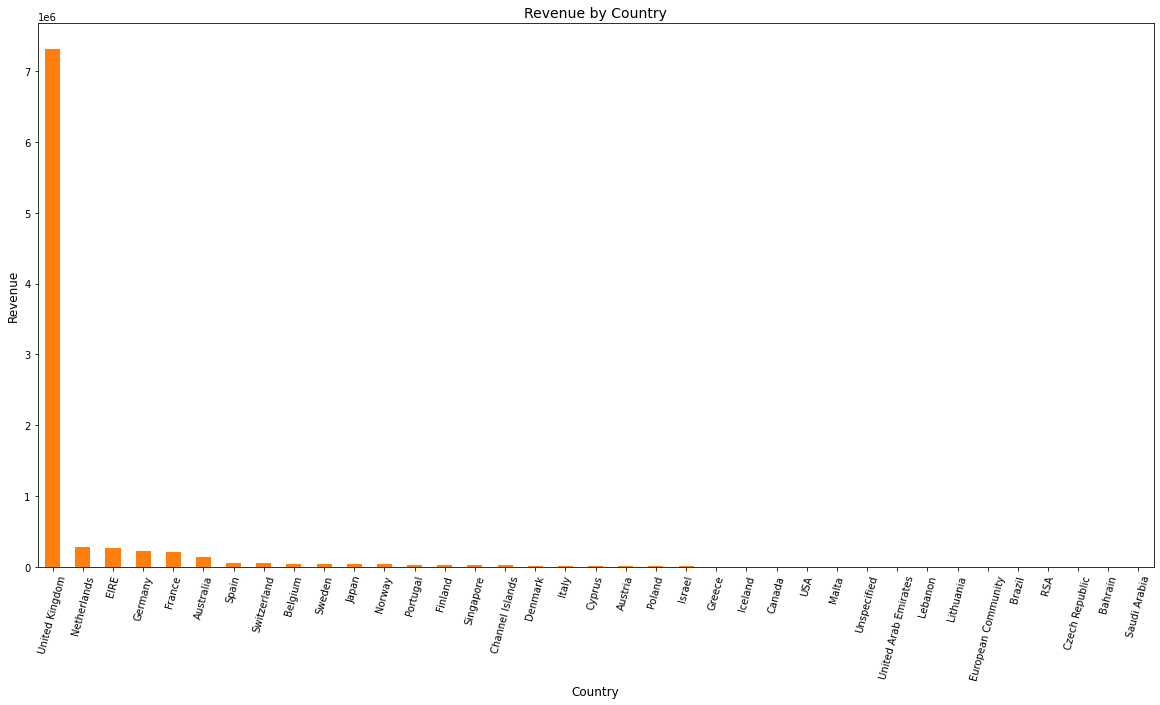

In [49]:
# Graph util function
def plot_bar(data, xlabel, ylabel, title, color=COLORS[1], figsize=(20,10), rotation=75):
    plot = data.plot(kind='bar', color=color, figsize=figsize)
    plot.set_xlabel(xlabel, fontsize=12)
    plot.set_ylabel(ylabel, fontsize=12)
    plot.set_title(title, fontsize=14)
    plot.set_xticklabels(labels=data.index, rotation=75)

plot_bar(rev_by_countries, 'Country', 'Revenue', 'Revenue by Country')

### 3.3 Monthly Sales Revenue

In [21]:
def extract_month(date):
    month = str(date.month)
    if date.month < 10:
        month = '0' + month
    return str(date.year) + month

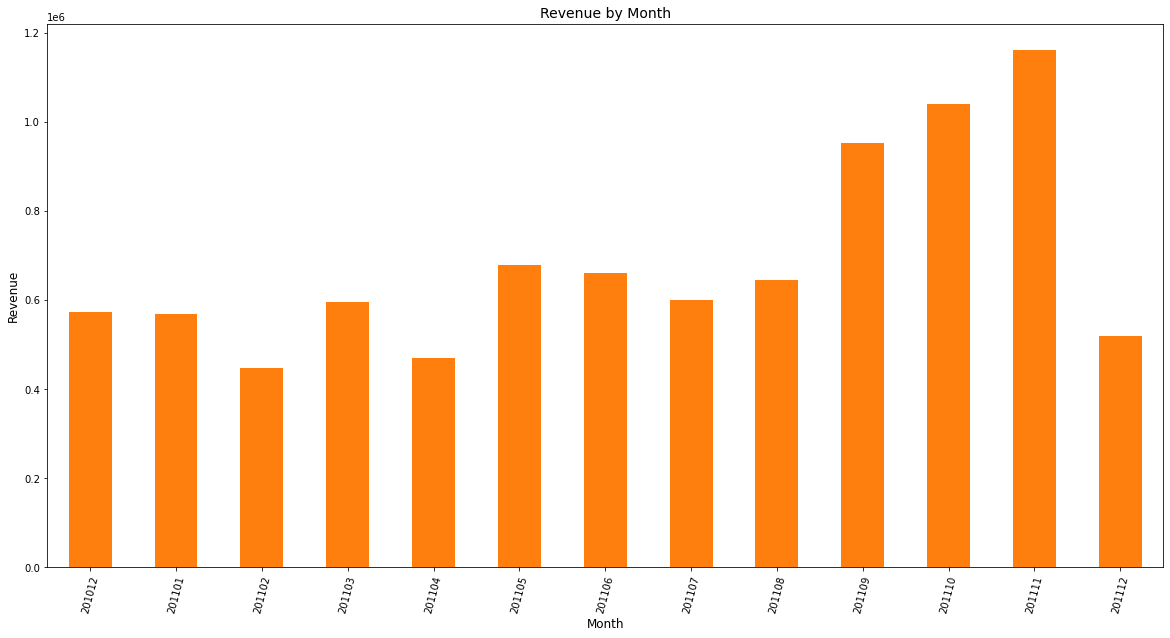

In [24]:
rev_by_month = df.set_index('InvoiceDate').groupby(extract_month).sum()['CheckoutPrice']
plot_bar(rev_by_month, 'Month', 'Revenue', 'Revenue by Month')

### 3.4 Day of the week Sales Revenue

In [26]:
rev_by_dow = df.set_index('InvoiceDate').groupby(lambda date:date.dayofweek).sum()['CheckoutPrice']
rev_by_dow

0    1367146.411
1    1700634.631
2    1588336.170
3    1976859.070
4    1485917.401
6     792514.221
Name: CheckoutPrice, dtype: float64

- No data for saturday (5)

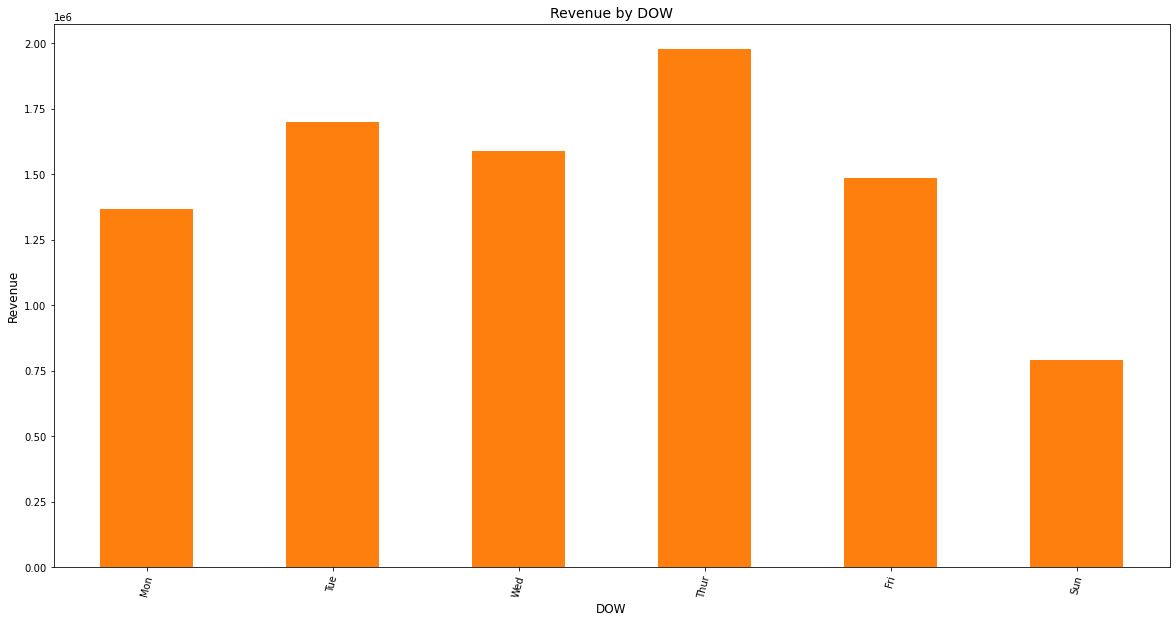

In [29]:
DAY_OF_WEEK = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
rev_by_dow.index = DAY_OF_WEEK[rev_by_dow.index]
plot_bar(rev_by_dow, 'DOW', 'Revenue', 'Revenue by DOW')

### 3.5 Hourly Sales Revenue

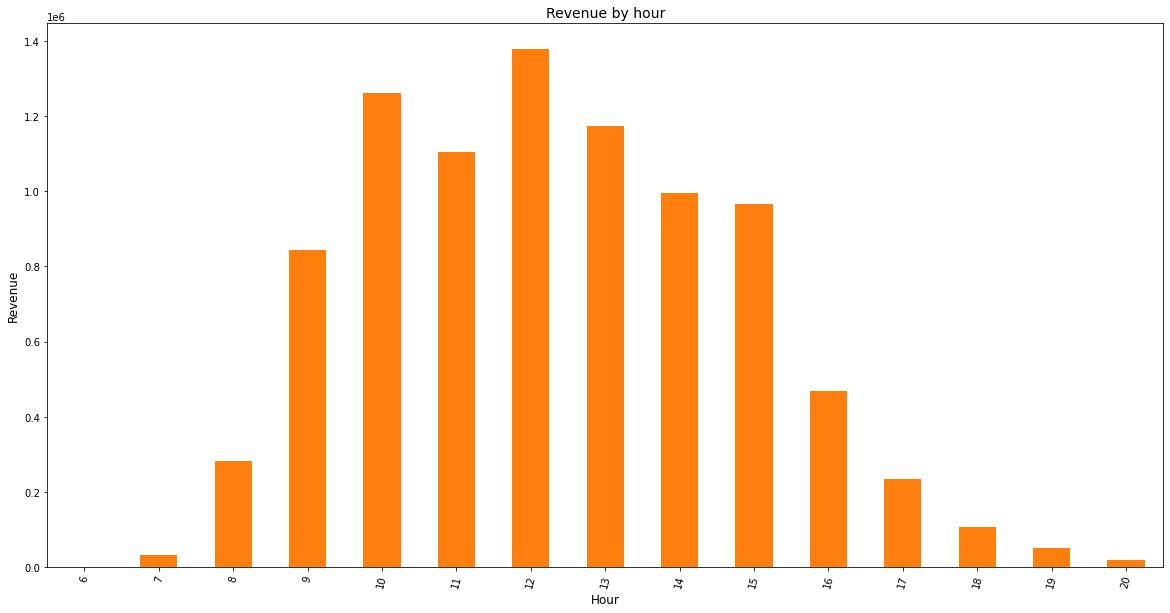

In [30]:
rev_by_hour = df.set_index('InvoiceDate').groupby(lambda date:date.hour).sum()['CheckoutPrice']
plot_bar(rev_by_hour, 'Hour', 'Revenue', 'Revenue by hour')

### Insight from Sales Revenue
- 82% of total sales revenue generated from UK.
- 2011-11 has the highest sales revenue, but all the data from 2011-12 was not fully collected.
    - Hypothesis: Sales revenue from November and Decmeber would be higher than other months due to holiday season (Black Friday, Christmas).
- Based on the day of weeek, an upward trend was visible from Monday to Thursday. But, this trend was converted into the downward trend as of Friday (No sales in Saturday, maybe due to human error or a specific company policy.
- A positive trend was occured from 7AM til 12PM, but there was a steep decrease in revenues after 3pm.

### 3.7 Top 10 Selling Products

In [35]:
top_selling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:10]
top_selling

StockCode
23843     80995
23166     77916
84077     54415
22197     49183
85099B    46181
85123A    36782
84879     35362
21212     33693
23084     27202
22492     26076
Name: Quantity, dtype: int64

### 3.8 Top 10 Products by Revnue

In [37]:
top_revenue = df.groupby('StockCode').sum()['CheckoutPrice'].sort_values(ascending=False)[:10]
top_revenue

StockCode
23843     168469.60
22423     142592.95
85123A    100603.50
85099B     85220.78
23166      81416.73
POST       77803.96
47566      68844.33
84879      56580.34
M          53779.93
23084      51346.20
Name: CheckoutPrice, dtype: float64

### 3.9 Top 3 item's Monthly Sales Revenue

In [46]:
top_selling = df.groupby('StockCode').sum()['Quantity'].sort_values(ascending=False)[:3]
monthly_top3 = df.set_index('InvoiceDate').groupby(['StockCode', extract_month]).sum()[['Quantity', 'CheckoutPrice']].loc[top_selling.index]
monthly_top3

Quantity  CheckoutPrice
StockCode                                
23843     201112     80995      168469.60
23166     201101     74215       77183.60
          201105       792         869.04
          201106       391         458.51
          201107       718         826.94
          201108       405         486.09
          201109       342         397.26
          201110       235         283.67
          201111       631         708.11
          201112       187         203.51
84077     201012      5139        1150.47
          201101      1488         385.44
          201102      3457         795.17
          201103      3888         943.20
          201104     10224        2281.44
          201105      4944        1249.44
          201106      1920         533.76
          201107      3600         982.56
          201108      2256         654.24
          201109      3462         985.70
          201110      8174        1953.98
          201111      4500        1294.20
          201112      1363         376.65

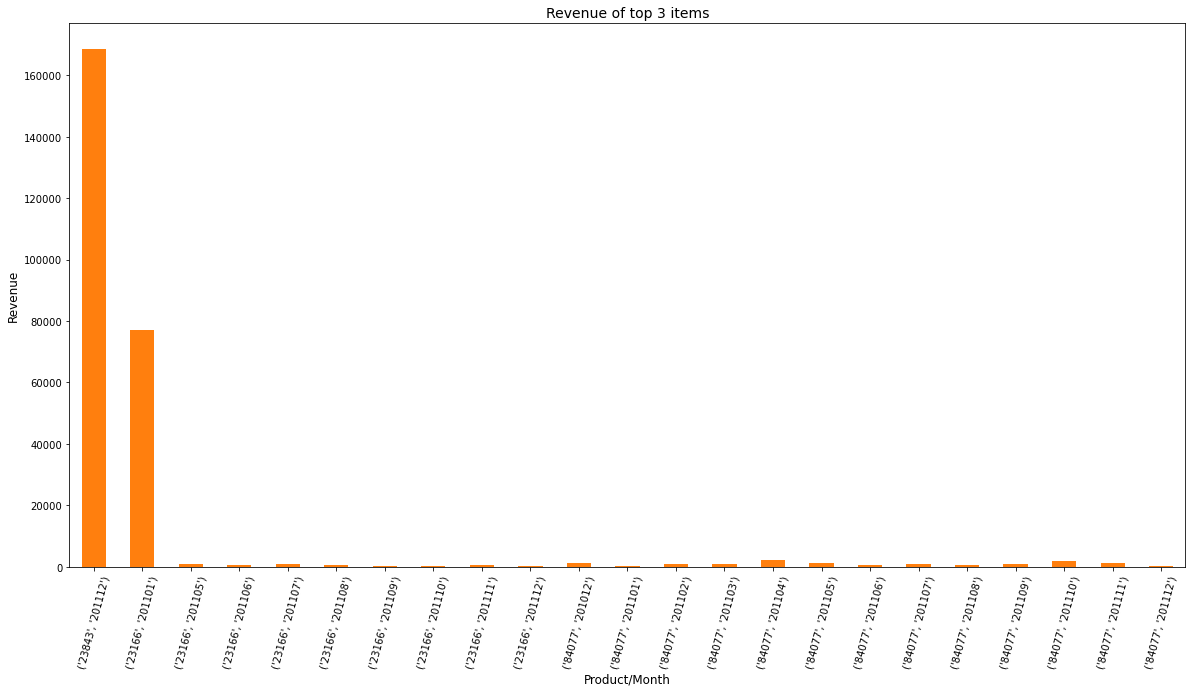

In [47]:
plot_bar(monthly_top3['CheckoutPrice'], 'Product/Month', 'Revenue', 'Revenue of top 3 items')